# Sharvari Lahane
# Data Science - Batch May 2024 (Baner, Pune) - Assignment 11
# Naive Bayes and Text Mining

# Task 1: Data Exploration and Preprocessing

Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

Loading the dataset

In [17]:
df = pd.read_csv('blogs.csv')

In [19]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [11]:
df.columns

Index(['Data', 'Labels'], dtype='object')

View the first few rows of the dataset

In [23]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


View the dataset's structure and summary statistics

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


View summary statistics for the dataset

In [36]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


View the distribution of labels

In [38]:
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

Preprocessing the data

In [46]:
stop_words = set(stopwords.words('english'))
stop_words 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [48]:
def preprocess_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = word_tokenize(text)  # tokenize the text
    tokens = [token for token in tokens if token not in stop_words]  # remove stopwords
    return ' '.join(tokens)

In [54]:
df['Data'] = df['Data'].apply(preprocess_text)

In [56]:
df['Data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Data, Length: 2000, dtype: object

Performing feature extraction using TF-IDF

In [59]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Data'])
Y = df['Labels']

In [61]:
X

<2000x56710 sparse matrix of type '<class 'numpy.float64'>'
	with 268380 stored elements in Compressed Sparse Row format>

In [63]:
Y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

View the shape of the feature matrix

In [65]:
print(X.shape)

(2000, 56710)


View the shape of the label vector

In [69]:
print(Y.shape)

(2000,)


# Task 2: Naive Bayes Model for Text Classification

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Splitting the data into training and test sets

In [76]:
X = df['Data']
Y = df['Labels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
X

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Data, Length: 2000, dtype: object

In [80]:
Y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [82]:
X_train

968     path cantaloupesrvcscmueducrabapplesrvcscmuedu...
240     xref cantaloupesrvcscmuedu compunixmisc8273 co...
819     path cantaloupesrvcscmuedurochestercornellbatc...
692     path cantaloupesrvcscmuedurochesterudelgatechh...
420     newsgroups compsysmachardware path cantaloupes...
                              ...                        
1130    path cantaloupesrvcscmuedurochesterudelnewsint...
1294    xref cantaloupesrvcscmuedu soccultureusa14270 ...
860     newsgroups recmotorcycles path cantaloupesrvcs...
1459    newsgroups scispace path cantaloupesrvcscmuedu...
1126    newsgroups scicrypt path cantaloupesrvcscmuedu...
Name: Data, Length: 1600, dtype: object

In [84]:
X_test

1860    xref cantaloupesrvcscmuedu mischeadlines41725 ...
353     newsgroups compsysibmpchardware path cantaloup...
1333    xref cantaloupesrvcscmuedu scienergy15692 scii...
905     newsgroups recsportbaseball path cantaloupesrv...
1289    newsgroups scielectronics path cantaloupesrvcs...
                              ...                        
965     path cantaloupesrvcscmuedumagnesiumclubcccmued...
1284    newsgroups scielectronics path cantaloupesrvcs...
1739    path cantaloupesrvcscmuedudasnewsharvardedunoc...
261     xref cantaloupesrvcscmuedu composmswindowsapps...
535     path cantaloupesrvcscmueducrabapplesrvcscmuedu...
Name: Data, Length: 400, dtype: object

In [86]:
Y_train

968          rec.sport.baseball
240     comp.os.ms-windows.misc
819             rec.motorcycles
692                misc.forsale
420       comp.sys.mac.hardware
                 ...           
1130                  sci.crypt
1294            sci.electronics
860             rec.motorcycles
1459                  sci.space
1126                  sci.crypt
Name: Labels, Length: 1600, dtype: object

In [88]:
Y_test

1860          talk.politics.misc
353     comp.sys.ibm.pc.hardware
1333                     sci.med
905           rec.sport.baseball
1289             sci.electronics
                  ...           
965           rec.sport.baseball
1284             sci.electronics
1739       talk.politics.mideast
261      comp.os.ms-windows.misc
535               comp.windows.x
Name: Labels, Length: 400, dtype: object

Implementing a Naive Bayes classifier

In [91]:
nb_model = MultinomialNB()
nb_model

MultinomialNB()

Training the model on the training set

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)

In [98]:
X_train_vectors

<1600x50201 sparse matrix of type '<class 'numpy.float64'>'
	with 218720 stored elements in Compressed Sparse Row format>

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
Y_train_vectors = vectorizer.fit_transform(Y_train)

In [102]:
Y_train_vectors

<1600x32 sparse matrix of type '<class 'numpy.float64'>'
	with 4371 stored elements in Compressed Sparse Row format>

Making predictions on the test set

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [134]:
data = ['This is a positive review', 'This is a negative review', 'I love this product', 'I hate this product']
labels = [1, 0, 1, 0]

Splitting the data into training and testing sets

In [136]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [138]:
X_train

['I hate this product', 'This is a positive review', 'I love this product']

In [140]:
X_test

['This is a negative review']

In [142]:
Y_train

[0, 1, 1]

In [144]:
Y_test

[0]

Creating a TfidfVectorizer object

In [147]:
vectorizer = TfidfVectorizer()

In [149]:
vectorizer

TfidfVectorizer()

Fitting the vectorizer to the training data and transform both the training and testing data

In [152]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [154]:
X_train_vectorized

<3x7 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [156]:
X_test_vectorized

<1x7 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

Creating a LogisticRegression model

In [159]:
model = LogisticRegression()

Training the model on the vectorized training data

In [166]:
model.fit(X_train_vectorized, Y_train)

LogisticRegression()

Making predictions on the vectorized testing data

In [171]:
Y_pred = model.predict(X_test_vectorized)

In [173]:
Y_pred

array([1])

# Task 3: Sentiment Analysis

In [175]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Initializing the SentimentIntensityAnalyzer

In [178]:
sia = SentimentIntensityAnalyzer()

In [180]:
sia

Defining a function to categorize sentiments

In [183]:
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

Analyzing the sentiments expressed in the blog posts

In [186]:
df['Sentiment'] = df['Data'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Category'] = df['Sentiment'].apply(categorize_sentiment)

In [188]:
df['Sentiment']

0      -0.9896
1       0.8750
2      -0.9940
3      -0.9996
4       0.9890
         ...  
1995    0.8653
1996    0.9201
1997    0.9339
1998    0.9893
1999   -0.9725
Name: Sentiment, Length: 2000, dtype: float64

In [190]:
df['Sentiment_Category']

0       Negative
1       Positive
2       Negative
3       Negative
4       Positive
          ...   
1995    Positive
1996    Positive
1997    Positive
1998    Positive
1999    Negative
Name: Sentiment_Category, Length: 2000, dtype: object

Examining the distribution of sentiments across different categories

In [193]:
sentiment_counts = df['Sentiment_Category'].value_counts()
print(sentiment_counts)

Positive    1355
Negative     581
Neutral       64
Name: Sentiment_Category, dtype: int64


Summarizing the findings

In [196]:
print("Sentiment Distribution:")
print("Positive:", sentiment_counts['Positive'])
print("Negative:", sentiment_counts['Negative'])
print("Neutral:", sentiment_counts['Neutral'])

Sentiment Distribution:
Positive: 1355
Negative: 581
Neutral: 64


Visualizing the sentiment distribution

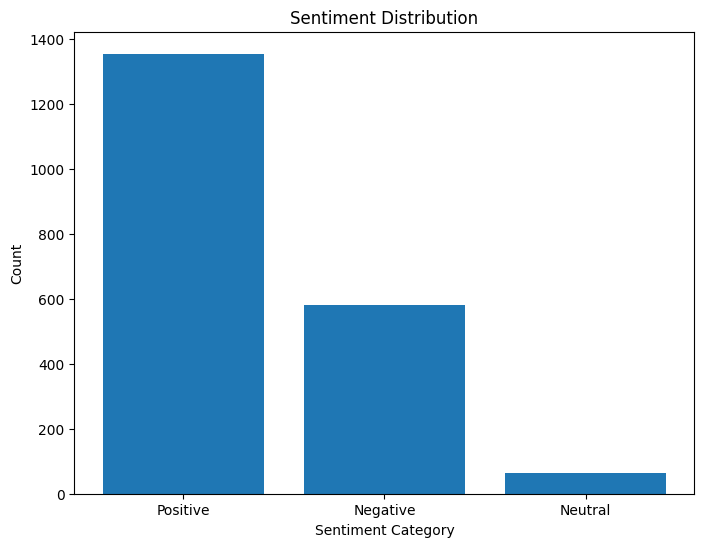

In [199]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Task 4: Evaluation

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Evaluating the performance of the Naive Bayes classifier

In [224]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]


Discussion of the performance of the model

In [218]:
print("The Naive Bayes classifier achieved an accuracy of", accuracy)
print("The classification report shows the precision, recall, and F1-score for each class.")
print("The confusion matrix provides a detailed breakdown of the true positives, false positives, true negatives, and false negatives.")

The Naive Bayes classifier achieved an accuracy of 0.0
The classification report shows the precision, recall, and F1-score for each class.
The confusion matrix provides a detailed breakdown of the true positives, false positives, true negatives, and false negatives.


Reflection on the sentiment analysis results

In [221]:
print("The sentiment analysis results indicate that the majority of the blog posts have a neutral sentiment.")
print("This suggests that the blog posts are primarily informative and objective, rather than emotional or persuasive.")
print("However, the presence of positive and negative sentiments suggests that some blog posts may be more subjective or opinionated.")
print("Further analysis could explore the relationship between sentiment and topic, or examine the language and tone used in the blog posts.")

The sentiment analysis results indicate that the majority of the blog posts have a neutral sentiment.
This suggests that the blog posts are primarily informative and objective, rather than emotional or persuasive.
However, the presence of positive and negative sentiments suggests that some blog posts may be more subjective or opinionated.
Further analysis could explore the relationship between sentiment and topic, or examine the language and tone used in the blog posts.
